In [33]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

### For Colab

In [34]:
mps_device = torch.device("mps")

# Create a Tensor directly on the mps device
x = torch.ones(5, device=mps_device)
# Or
x = torch.ones(5, device="mps")

x.device

device(type='mps', index=0)

In [35]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [36]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [37]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [38]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        
        if (re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt", file_path) or
            re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt", file_path)):
            print(f"Currently working on: {file_path}")
            get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt


dtype('float32')

In [39]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.9037e+04, 2.9038e+04,
        2.9039e+04], dtype=float32),
 dtype('float32'))

In [40]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,3.0
1,1.0,3.0
2,2.0,3.0
3,3.0,3.0
4,4.0,3.0
...,...,...
29035,29035.0,10.1
29036,29036.0,10.1
29037,29037.0,10.1
29038,29038.0,10.1


([<matplotlib.lines.Line2D at 0x3375a4880>], pandas.core.frame.DataFrame)

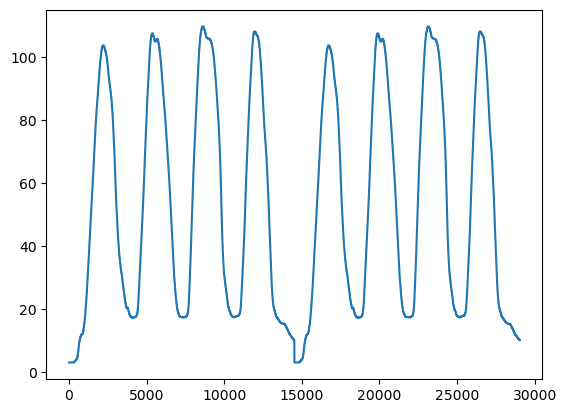

In [41]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [42]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    # df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(          Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7          7.0         3.0        6.0        5.0        4.0        3.0   
 8          8.0         3.0        7.0        6.0        5.0        4.0   
 9          9.0         3.0        8.0        7.0        6.0        5.0   
 10        10.0         3.0        9.0        8.0        7.0        6.0   
 11        11.0         3.0       10.0        9.0        8.0        7.0   
 ...        ...         ...        ...        ...        ...        ...   
 29035  29035.0        10.1    29034.0    29033.0    29032.0    29031.0   
 29036  29036.0        10.1    29035.0    29034.0    29033.0    29032.0   
 29037  29037.0        10.1    29036.0    29035.0    29034.0    29033.0   
 29038  29038.0        10.1    29037.0    29036.0    29035.0    29034.0   
 29039  29039.0        10.1    29038.0    29037.0    29036.0    29035.0   
 
        Time(t-5)  Time(t-6)  Time(t-7)  
 7            2.0        1.0        0.0  
 8            

In [43]:
columnsTitles = ['FX Channel', 'Time']

for i in range(n_steps+1):
    columnsTitles.append(f"Time(t-{i})")

shifted_df = shifted_df.reindex(columns=columnsTitles)
shifted_df = shifted_df.drop(columns=["Time(t-0)"])

shifted_df, type(columnsTitles), len(columnsTitles), shifted_df.shape

(       FX Channel     Time  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7             3.0      7.0        6.0        5.0        4.0        3.0   
 8             3.0      8.0        7.0        6.0        5.0        4.0   
 9             3.0      9.0        8.0        7.0        6.0        5.0   
 10            3.0     10.0        9.0        8.0        7.0        6.0   
 11            3.0     11.0       10.0        9.0        8.0        7.0   
 ...           ...      ...        ...        ...        ...        ...   
 29035        10.1  29035.0    29034.0    29033.0    29032.0    29031.0   
 29036        10.1  29036.0    29035.0    29034.0    29033.0    29032.0   
 29037        10.1  29037.0    29036.0    29035.0    29034.0    29033.0   
 29038        10.1  29038.0    29037.0    29036.0    29035.0    29034.0   
 29039        10.1  29039.0    29038.0    29037.0    29036.0    29035.0   
 
        Time(t-5)  Time(t-6)  Time(t-7)  
 7            2.0        1.0        0.0  
 8            

In [44]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset


((29033, 9),
 array([[3.0000e+00, 7.0000e+00, 6.0000e+00, ..., 2.0000e+00, 1.0000e+00,
         0.0000e+00],
        [3.0000e+00, 8.0000e+00, 7.0000e+00, ..., 3.0000e+00, 2.0000e+00,
         1.0000e+00],
        [3.0000e+00, 9.0000e+00, 8.0000e+00, ..., 4.0000e+00, 3.0000e+00,
         2.0000e+00],
        ...,
        [1.0100e+01, 2.9037e+04, 2.9036e+04, ..., 2.9032e+04, 2.9031e+04,
         2.9030e+04],
        [1.0100e+01, 2.9038e+04, 2.9037e+04, ..., 2.9033e+04, 2.9032e+04,
         2.9031e+04],
        [1.0100e+01, 2.9039e+04, 2.9038e+04, ..., 2.9034e+04, 2.9033e+04,
         2.9032e+04]], dtype=float32))

In [45]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((29033, 8),
 (29033,),
 3.0,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [46]:
X = dc(np.flip(X, axis=1))
X

array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 5.0000e+00, 6.0000e+00,
        7.0000e+00],
       [1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 6.0000e+00, 7.0000e+00,
        8.0000e+00],
       [2.0000e+00, 3.0000e+00, 4.0000e+00, ..., 7.0000e+00, 8.0000e+00,
        9.0000e+00],
       ...,
       [2.9030e+04, 2.9031e+04, 2.9032e+04, ..., 2.9035e+04, 2.9036e+04,
        2.9037e+04],
       [2.9031e+04, 2.9032e+04, 2.9033e+04, ..., 2.9036e+04, 2.9037e+04,
        2.9038e+04],
       [2.9032e+04, 2.9033e+04, 2.9034e+04, ..., 2.9037e+04, 2.9038e+04,
        2.9039e+04]], dtype=float32)

In [47]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# X = scaler.fit_transform(X)
# y = scaler.fit_transform(y.reshape(-1,1))

In [48]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23226, 8), (5807, 8), (23226,), (5807,))

In [49]:
# X_train = torch.tensor(X_train).float()
# y_train = torch.tensor(y_train).float()
# X_test = torch.tensor(X_test).float()
# y_test = torch.tensor(y_test).float()

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [50]:
# plt.plot(X_train, y_train)

In [51]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# y_train = scaler.fit_transform(y_train.reshape(-1, 1))
# y_test = scaler.fit_transform(y_test.reshape(-1, 1))

# X_train.shape, y_train.shape

In [52]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([23226, 8]),
 torch.Size([5807, 8]),
 torch.Size([23226, 1]),
 torch.Size([5807, 1]))

In [53]:
type(X_train)

torch.Tensor

In [54]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([23226, 8, 1]),
 torch.Size([5807, 8, 1]),
 torch.Size([23226, 1]),
 torch.Size([5807, 1]))

In [55]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'mps'

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([23226, 8, 1]),
 torch.Size([5807, 8, 1]),
 torch.Size([23226, 1]),
 torch.Size([5807, 1]))

In [57]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [58]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 64

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)

#check out what we've created
print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x3375dab00>, <torch.utils.data.dataloader.DataLoader object at 0x324000d90>)
Length of train_dataloader: 363 batches of 64
Length of train_dataloader: 91 batches of 64


In [59]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 8, 1]) torch.Size([64, 1])


In [60]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'mps'

In [61]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True, dropout=0.05)
        
        self.fc = nn.Linear(hidden_size, 1, bias=True)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

/Users/jm/miniforge3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [62]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    train_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

    global train_acc
    train_acc = np.append(train_acc, train_loss/len(train_loader))
    print()

In [63]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0
    test_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.inference_mode():
            output = model(x_batch)
            # print(f"{y_batch.shape}")
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            test_loss += loss.item()
                

    avg_loss_across_batches = running_loss / len(test_loader)
    global test_acc
    test_acc = np.append(test_acc, avg_loss_across_batches)

    test_loss = 0.0
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [73]:
learning_rate = 0.01
num_epochs = 250
loss_function = nn.L1Loss()
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=learning_rate, 
#                              weight_decay=1e-5)

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate
                            )
train_acc = np.array([])
test_acc = np.array([])
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 32.827
Batch 200, Loss: 32.913
Batch 300, Loss: 33.191

Val Loss: 33.787
***************************************************

Epoch: 2
Batch 100, Loss: 32.820
Batch 200, Loss: 32.369
Batch 300, Loss: 33.400

Val Loss: 33.809
***************************************************

Epoch: 3
Batch 100, Loss: 32.637
Batch 200, Loss: 33.213
Batch 300, Loss: 32.795

Val Loss: 33.885
***************************************************

Epoch: 4
Batch 100, Loss: 33.042
Batch 200, Loss: 32.601
Batch 300, Loss: 32.991

Val Loss: 33.890
***************************************************

Epoch: 5
Batch 100, Loss: 32.785
Batch 200, Loss: 32.699
Batch 300, Loss: 33.031

Val Loss: 33.913
***************************************************

Epoch: 6
Batch 100, Loss: 32.702
Batch 200, Loss: 32.718
Batch 300, Loss: 32.865

Val Loss: 33.914
***************************************************

Epoch: 7
Batch 100, Loss: 32.847
Batch 200, Loss: 32.602
Batch 300, Loss: 32.983

Val Lo

KeyboardInterrupt: 

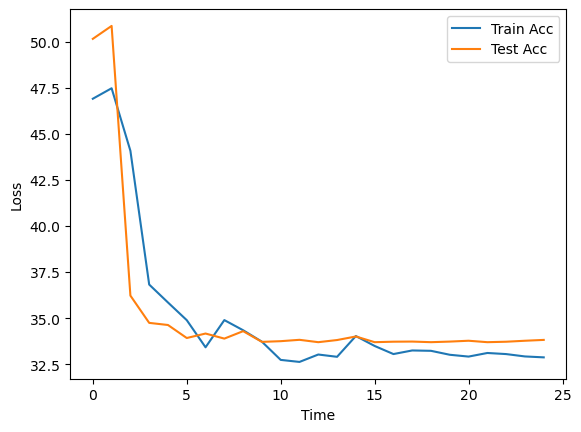

In [65]:
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.show()

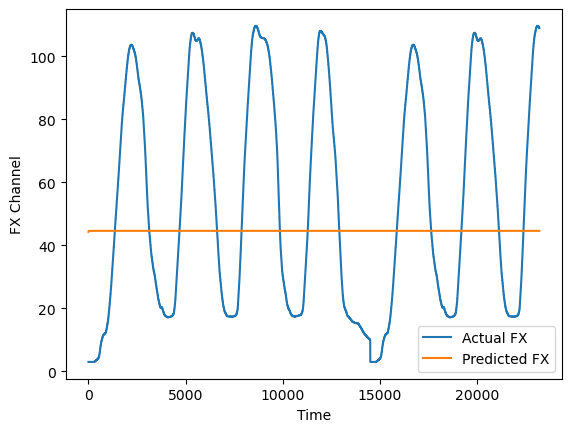

In [72]:
model.eval()
with torch.inference_mode():
    predicted = model((X_train).to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


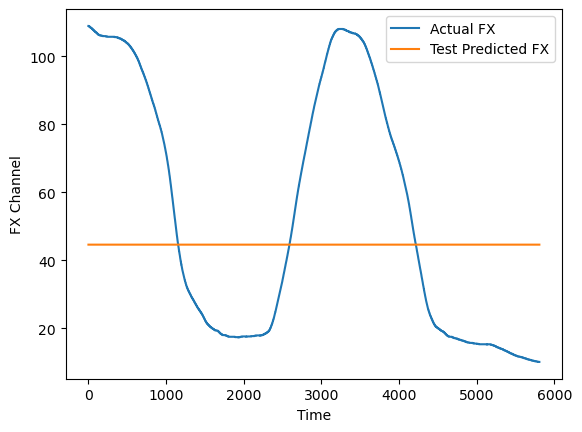

In [67]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [68]:
X_test.shape, X_test[0]

(torch.Size([5807, 8, 1]),
 tensor([[23226.],
         [23227.],
         [23228.],
         [23229.],
         [23230.],
         [23231.],
         [23232.],
         [23233.]]))

In [69]:
temp = torch.arange(0, 1, 0.000016)
temp = temp.unsqueeze(dim=1)
temp.shape

torch.Size([62500, 1])

In [70]:
# model.eval()
# with torch.inference_mode():
#     test_pred = model(temp.unsqueeze(dim=1)).to('cpu').numpy()

# # plt.xlim(0, (10000))
# # plt.ylim(-0, 1)
# # plt.autoscale(False)
# plt.plot(y_test, label='Actual FX')
# plt.plot(test_pred, label='Test Predicted FX')
# plt.xlabel('Time')
# plt.ylabel('FX Channel')
# plt.legend()
# plt.show()

RuntimeError: Input and hidden tensors are not at the same device, found input tensor at cpu and hidden tensor at mps:0

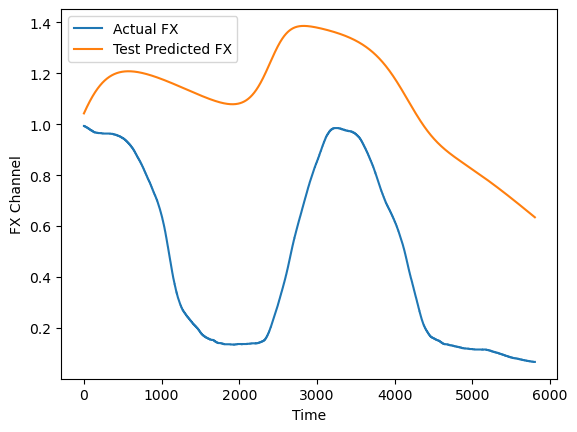

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [ ]:
y_test[0], y_test[5800], y_train[0], y_train[23000]

(tensor([0.9934]), tensor([0.0665]), tensor([0.]), tensor([0.9775]))

In [ ]:
X_test.max(), X_test.min()

(tensor(1.0000), tensor(0.8000))